---

# MACHINE LEARNING AVANZADO MDS19 UDD


## Desafío 2: Análisis de NLP





#### Profesor      : Francisco Altimiras.
#### Alumnos      : Roy Barrera, José Pérez.

---
## Objetivo

El objetivo general de la actividad es evaluar la manipulación y presentación de resultados de análisis de NLP.

Se espera identificar los tópicos más relevantes hablados por los usuarios.



## Resumen

Para el desarrollo del presente desafío se ha investigado en la WWW, en busca de orientación y ejemplos que nos puedan ayudar de la mejor manera posible a enfrentar y dar solución al segundo desafío propuesto. De ta forma que dentro de la abanico de ejemplos que hemos encontrado, decantamos por usar como base de este deafío el siguiente trabajo:

https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/

Dicho lo anterior, comentamos que el presente desafío se estrucura de la siguiente manera:

* Carga y exploración de los datos.
* Limpieza, normalizado y lematizado de la data.
* Nube de palabras.
* Estadísticas de palabras por mes.
* Análisis de sentimientos.
* Identificación de tópicos relevantes.
* Conclusión.

# <a> ÍNDICE</a>
- <a href='#1'>1. Carga, exploración y manipulación de la data.</a>
    - <a href='#1.1'>1.1. Agrupación del texto por fecha.</a>
- <a href='#2'>2. Limpieza, normalizado y lematizado de la data.</a>
    - <a href='#2.1'>2.1. Ciclos de limpieza.</a>
    - <a href='#2.2'>2.2. Normalizado y Lematizado.</a>
    - <a href='#2.3'>2.3. CountVectorizer y stop_words.</a>
- <a href='#3'>3. Análisis de la data.</a>
- <a href='#4'>4. Nube de palabras.</a>
- <a href='#5'>5. Estadísticas de palabras por mes.</a>
- <a href='#6'>6. Análisis de sentimientos.</a>
    - <a href='#6.1'>6.1. TextBlob, translate, sentiment.</a>
    - <a href='#6.2'>6.2. Gráfica de Análisis de Sentimiento.</a>
- <a href='#7'>7. Identificación de tópicos relevantes.</a>
    - <a href='#7.1.'>7.1 Primera aproximación a identificación de tópicos relevantes.</a>
    - <a href='#7.2.'>7.2 Identificación de tópicos relevantes usando sustantivos.</a>
    - <a href='#7.3.'>7.3 Identificación de tópicos relevantes usando sustantivos y adjetivos.</a>
- <a href='#8'>8. Conclusión.</a>

# <a id='1'>1. Carga, exploración y manipulación de la data.</a>

A continuación se inicia el desarrollo de este segundo desafío, mediante la lectura de la data para su exploración y manipulación inicial.

In [1]:
# Se importa libreria requerida
import pandas as pd
pd.set_option('max_colwidth',150)

# Se lee el dataset, con los textos ingresados por los usuarios.
df_01              = pd.read_csv("logs_textos_usuario.csv")
df_01['fecha_dia'] = df_01['createAt'].map(lambda s: s[0:4] + s[5:7] + s[8:10]).astype('int64')
df_01['fecha_mes'] = df_01['createAt'].map(lambda s: s[0:4] + s[5:7]).astype('int64')

# Se mira la cabecera de la data. 
df_01.head()


,conversationId,createAt,text,intent,intentScore,resolved,selectedOption,topIntent1,topIntent2,topIntent3,topIntent4,topIntent5,fecha_dia,fecha_mes
0,IpjbgtXNnnpIgEyfHvOwx5-3,2019-08-01 00:01:44.144000,hace aproximado tres meses me encuentro sin servicios en mi linia telefonica,KGB_CICLOS,0.082043,NO,5.0,CONSUMO_DATOS_MOVIL,REINICIO_PLAN,KGB_CANALTV,HANDOVER_BAJA,Ninguna,20190801,201908
1,1iMLGqfjujnE6ivSxoibPL-3,2019-08-01 00:59:56.595600,Consumo de datos y minutos de preplan,CONSUMO_MINUTOS_MOVIL,0.970370,NO,5.0,CONSUMO_DATOS_MOVIL,CONSUMO_DATOS_FIJO,KGB_CAMBIADATOSPERSONALESSV,REINICIO_PLAN,Ninguna,20190801,201908
2,I5LmIw0DGguBRYRMYg0bPk-3,2019-08-01 09:23:32.233200,Hola necesito que me indiques mi boleta de Internet hogar que aun no me ha llegado nada,REINICIO_PLAN,0.772536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190801,201908
3,JBdW3JgPwXLEagOBel3LjP-3,2019-08-01 10:04:56.456000,Me cortaron el servicio por un monto no pagado según ustedes pero fue cancelado el viernes pasado y el monto que me cobran es el descuento que isi...,HANDOVER_RECLAMOS,0.426874,SI,NaN,NaN,NaN,NaN,NaN,NaN,20190801,201908
4,JBdW3JgPwXLEagOBel3LjP-3,2019-08-01 10:06:23.623000,Me puede llamar un ejecutivo urgente,HANDOVER_SOLICITUDES,0.996697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190801,201908


## <a id='1.1'>1.1. Agrupación del texto por fecha.</a>

De cara a dar solución al segundo desafío planteado, creemos que las variables relevantes del dataset son createAt correspondiente a la fecha de creación, y text que es lo escrito por los usuarios.
__Estrategia:__ en principio haremos 2 agrupaciones de los textos ingresados por los usuarios, la primera por agrupación es por dia y la segunda agrupará los textos ingresados por mes.

In [2]:
# Se contabibilizan la cantidad de muestras agrupadas por día
df_dia_ntexto = df_01.groupby(['fecha_dia'], as_index=False)[['text']].count()
print(df_dia_ntexto.head())
# Se contabibilizan la cantidad de muestras agrupadas por día
df_mes_ntexto = df_01.groupby(['fecha_mes'], as_index=False)[['text']].count()
print(df_mes_ntexto.head())

   fecha_dia  text
0   20190801    88
1   20190802   143
2   20190803   111
3   20190804    74
4   20190805   154
   fecha_mes   text
0     201908   5227
1     201909   7404
2     201910  12159
3     201911  29724


In [3]:
# Se define la función trae indices, que obtiene las posiciones iniciales y finales de las muestras,
# según se este agrupando por día, o se este agrupando por mes.
def trae_indices(df_01, df_02, cfecha):
    l_fech_indi = []
    for fecha in df_01[cfecha]:
        l_fech_indi.append([fecha,
                            df_02[df_02[cfecha] == fecha].index.min(),
                            df_02[df_02[cfecha] == fecha].index.max()])
    return l_fech_indi
# Se obtienen las posiciones iniciales y finales cuando se agrupa por mes.
l_mes = trae_indices(df_mes_ntexto, df_01, 'fecha_mes') 
print(len(l_mes), l_mes)

# Se obtienen las posiciones iniciales y finales cuando se agrupa por mes.
l_dia = trae_indices(df_dia_ntexto, df_01, 'fecha_dia')
print(len(l_dia), l_dia)

4 [[201908, 0, 5226], [201909, 5227, 12630], [201910, 12631, 24789], [201911, 24790, 54513]]
122 [[20190801, 0, 87], [20190802, 88, 230], [20190803, 231, 341], [20190804, 342, 415], [20190805, 416, 569], [20190806, 570, 792], [20190807, 793, 954], [20190808, 955, 1116], [20190809, 1117, 1305], [20190810, 1306, 1411], [20190811, 1412, 1468], [20190812, 1469, 1675], [20190813, 1676, 1860], [20190814, 1861, 2001], [20190815, 2002, 2099], [20190816, 2100, 2297], [20190817, 2298, 2402], [20190818, 2403, 2480], [20190819, 2481, 2661], [20190820, 2662, 2789], [20190821, 2790, 3025], [20190822, 3026, 3146], [20190823, 3147, 3250], [20190824, 3251, 3370], [20190825, 3371, 3438], [20190826, 3439, 3755], [20190827, 3756, 4084], [20190828, 4085, 4406], [20190829, 4407, 4762], [20190830, 4763, 5058], [20190831, 5059, 5226], [20190901, 5227, 5387], [20190902, 5388, 5774], [20190903, 5775, 6069], [20190904, 6070, 6369], [20190905, 6370, 6623], [20190906, 6624, 6932], [20190907, 6933, 7108], [20190908

Se requiere ahora agrupar y guardar el texto por fecha, sea esta agruación diaria o mensual.

In [4]:
# Se define la función guarda_texto_x_fecha(), que toma de entrada el dataframe df, agrupa ctexto
# según cfecha, usando los indices de l_fecha_indices.
def guarda_texto_x_fecha(df, ctexto, cfecha, l_fecha_indices):
    
    dicci = {}
    l_s01 = []
    ln    = len(l_fecha_indices)

    for i in range(ln):
        fecha   = l_fecha_indices[i][0]
        pos_ini = l_fecha_indices[i][1]
        pos_fin = l_fecha_indices[i][2]
        s01     = ''
        
        #print(i,fecha,pos_ini,pos_fin)
        for j in range(pos_ini,(pos_fin + 1)):
            s01 += df[ctexto][df[cfecha] ==  fecha][j] + ' '
        
        l_s01.append(s01)
        dicci[fecha] = l_s01[i]
        
    return l_s01 , dicci

# Se obtiene el listado de los textos agrupados por mes, y el diccionario asociado.
l_mes_text, d_mes_text = guarda_texto_x_fecha(df_01,'text','fecha_mes',l_mes)



In [5]:
# Se obtiene el listado de los textos agrupados por día, y el diccionario asociado.
l_dia_text, d_dia_text = guarda_texto_x_fecha(df_01,'text','fecha_dia',l_dia)

__NOTA:__ Dado que hemos agrupado los textos de los usuarios tanto por día como por mes, de ahora en adelante como un primer ejercicio continuaremos trabajando con la data agrupada a nivel de mes.


In [6]:
# Se genera el dataframe data_df, el indice corrsponde al mes y la variable texto, guarda todos los
# textos de ese mes.
data_combinado = {key: [value] for (key, value) in d_mes_text.items()}
data_df = pd.DataFrame.from_dict(data_combinado).transpose()
data_df.columns = ['texto']
data_df = data_df.sort_index()
data_df

,texto
201908,hace aproximado tres meses me encuentro sin servicios en mi linia telefonica Consumo de datos y minutos de preplan Hola necesito que me indiques m...
201909,Hola hoy pague mi boleta vencida en sencillito y aun no reponen el servicio de internet COMO VEO SI TENGO SALDO EN MI CELULAR mi telefono es con p...
201910,Necesito pagar mi ultima boleta Hoy transferi mis 4 lineas a mi hijo y no encuentro como pagar la ultima boleta Gracias revisar mi deuda Hola no p...
201911,estado de mi linea portbilidad Portabilidad Roxana Allende 95169244 Roxana allende Tengo una duda Necesito saber cuanto es el maximo que puedo gas...


In [7]:
# Es guardado el dataframe data_df en formato pickle para usar más adelante.
data_df.to_pickle("corpus.pkl")

# <a id='2'>2. Limpieza, normalizado y lematizado de la data.</a>

En esta etapa entonces se inicia la limpeza de la data, y junto con ello, dada la naturaleza del objetivo a cumplir, se realiza el normalizado y lematizado de la data.

## <a id='2.1'>2.1. Ciclos de limpieza.</a>

In [8]:
# Primer ciclo de limpieza
import re
import string

def clean_text_ciclo1(text):
    '''Escribe texto en minúsculas, elimina el texto entre corchetes, 
    elimina los signos de puntuación y elimina las palabras que contienen números'''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

ciclo1   = lambda x: clean_text_ciclo1(x)

# Aplicamos y miramos el primer ciclo de limpieza
data_clean = pd.DataFrame(data_df.texto.apply(ciclo1))
data_clean

,texto
201908,hace aproximado tres meses me encuentro sin servicios en mi linia telefonica consumo de datos y minutos de preplan hola necesito que me indiques m...
201909,hola hoy pague mi boleta vencida en sencillito y aun no reponen el servicio de internet como veo si tengo saldo en mi celular mi telefono es con p...
201910,necesito pagar mi ultima boleta hoy transferi mis lineas a mi hijo y no encuentro como pagar la ultima boleta gracias revisar mi deuda hola no pu...
201911,estado de mi linea portbilidad portabilidad roxana allende roxana allende tengo una duda necesito saber cuanto es el maximo que puedo gastar al u...


In [9]:
# Segundo ciclo de limpieza
def clean_text_ciclo2(text):
    '''Elimina la puntuación adicional y el texto no sensible.'''
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

ciclo2   = lambda x: clean_text_ciclo2(x)

# Aplicamos y miramos el segundo ciclo de limpieza
data_clean = pd.DataFrame(data_clean.texto.apply(ciclo2))
data_clean

,texto
201908,hace aproximado tres meses me encuentro sin servicios en mi linia telefonica consumo de datos y minutos de preplan hola necesito que me indiques m...
201909,hola hoy pague mi boleta vencida en sencillito y aun no reponen el servicio de internet como veo si tengo saldo en mi celular mi telefono es con p...
201910,necesito pagar mi ultima boleta hoy transferi mis lineas a mi hijo y no encuentro como pagar la ultima boleta gracias revisar mi deuda hola no pu...
201911,estado de mi linea portbilidad portabilidad roxana allende roxana allende tengo una duda necesito saber cuanto es el maximo que puedo gastar al u...


## <a id='2.2'>2.2. Normalizado y Lematizado.</a>

In [10]:
# En este ciclo aplicaremos el Normalizado

# Se importa la libreria requerida
import spacy

nlp = spacy.load('es_core_news_sm')

# Dado el tamaño de la data a procesar se requiere aumentar el tamaño que puede ser procesado.
nlp.max_length = 2000000

def clean_text_ciclo3(text):
    doc   = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
    
    return " ".join(lexical_tokens)


ciclo3    = lambda x: clean_text_ciclo3(x)

# Aplicamos y miramos el tercer ciclo que corresponde al normalizado.

data_clean = pd.DataFrame(data_clean.texto.apply(ciclo3))
data_clean
                

,texto
201908,aproximado meses encuentro servicios linia telefonica consumo datos minutos preplan hola necesito indiques boleta internet hogar llegado cortaron ...
201909,hola pague boleta vencida sencillito reponen servicio internet saldo celular telefono plan llamar necesito pagar plan mire problema page banco des...
201910,necesito pagar ultima boleta transferi lineas hijo encuentro pagar ultima boleta gracias revisar deuda hola llamar corta quiero ultima boleta hola...
201911,linea portbilidad portabilidad roxana allende roxana allende duda necesito maximo gastar facturacion movistar google play chupalo stock stock qued...


In [11]:
# En este cuarto ciclo aplicaremos el lematizado

import spacy

nlp = spacy.load('es_core_news_sm')
nlp.max_length = 2000000

def clean_text_ciclo4(text):
    doc   = nlp(text)
    lemmas = [tok.lemma_.lower() for tok in doc]
    
    return " ".join(lemmas)

ciclo4 = lambda x: clean_text_ciclo4(x)

# Aplicamos y miramos el cuarto ciclo que corresponde al lematizado.
data_clean = pd.DataFrame(data_clean.texto.apply(ciclo4))
data_clean



,texto
201908,aproximar mesar encontrar servicio linia telefonica consumir dato minuto preplan hola necesitar indicar boleta internet hogar llegar cortar servic...
201909,hola pagar boleta vencer sencillito reponer servicio internet saldar celular telefono plan llamar necesitar pagar plan mirar problema page banco d...
201910,necesitar pagar ultimar boleta transferi linear hijo encontrar pagar ultimar boleta gracia revisar deuda hola llamar corto querer ultimar boleta h...
201911,linear portbilidad portabilidad roxana allende roxana allende dudar necesitar maximo gastar facturacion movistar google play chupalo stock stock q...


## <a id='2.3'>2.3. CountVectorizer y stop_words.</a>


A continuación es creada una matriz de términos de documentos usando CountVectorizer, y son excluidas las palabras comunes en español.

In [12]:
# Es aplicado CountVectorizer y junto con ello stop_words.

# Se importan las librerías requeridas
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Se instancia CountVectorizer
cv = CountVectorizer(stop_words=stopwords.words('spanish'))

# Se aplica CountVectorizer
data_cv = cv.fit_transform(data_clean.texto)

# Es creado el dataframe data_dtm, que contiene la matriz de palabras
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aaaa,aaaah,aaaalooo,aaparece,abajar,abajito,abandonar,abaratar,abarcar,abastar,...,zumbido,zurito,zuñiga,área,ñara,ñine,ñlevo,ñuble,ñuñoa,óptico
201908,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,3
201909,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
201910,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
201911,1,1,0,1,2,1,0,1,1,0,...,0,0,0,0,0,1,1,1,9,0


In [13]:
# Es guardado el dataframe data_dtm en formato pickle, para usarlo después.
data_dtm.to_pickle("dtm.pkl")

# <a id='3'>3. Análisis de la data.</a>

In [14]:
# Se importa la librería requerida
import pickle

# Se guarda el dataframe data_clean en formato pickle.
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [15]:
# Se lee la matriz de terminos de palabras

# Se importa la librería requerida
import pandas as pd

# Se guarda en data la matriz 
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,201908,201909,201910,201911
aaaa,0,0,0,1
aaaah,0,0,0,1
aaaalooo,0,1,0,0
aaparece,0,0,0,1
abajar,0,0,0,2


In [16]:
# Búsqueda de las 30 palabras mas mencionadas (por mes)
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{201908: [('querer', 937),
  ('hola', 898),
  ('necesitar', 862),
  ('servicio', 652),
  ('internet', 604),
  ('plan', 584),
  ('pagar', 532),
  ('movistar', 366),
  ('numerar', 342),
  ('bajo', 329),
  ('boleta', 315),
  ('llamar', 313),
  ('hogar', 289),
  ('contratar', 257),
  ('telefono', 245),
  ('ejecutivo', 236),
  ('cambiar', 234),
  ('celular', 228),
  ('problema', 221),
  ('deuda', 217),
  ('equipar', 203),
  ('chip', 164),
  ('llegar', 153),
  ('activar', 131),
  ('cancelar', 127),
  ('sucursal', 121),
  ('funcionar', 116),
  ('comprar', 115),
  ('movil', 111),
  ('cobrar', 109)],
 201909: [('hola', 1325),
  ('necesitar', 1242),
  ('querer', 1163),
  ('servicio', 856),
  ('internet', 833),
  ('pagar', 800),
  ('plan', 735),
  ('numerar', 714),
  ('movistar', 566),
  ('boleta', 443),
  ('llamar', 441),
  ('telefono', 436),
  ('bajo', 394),
  ('hogar', 375),
  ('celular', 349),
  ('problema', 332),
  ('cambiar', 315),
  ('ejecutivo', 306),
  ('contratar', 298),
  ('deuda', 274

In [17]:
# Se muestran las 15 palabras top por mes.
for mes, top_words in top_dict.items():
    print(mes)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

201908
querer, hola, necesitar, servicio, internet, plan, pagar, movistar, numerar, bajo, boleta, llamar, hogar, contratar
---
201909
hola, necesitar, querer, servicio, internet, pagar, plan, numerar, movistar, boleta, llamar, telefono, bajo, hogar
---
201910
hola, necesitar, querer, internet, servicio, pagar, plan, numerar, movistar, boleta, llamar, bajo, hogar, telefono
---
201911
hola, necesitar, querer, internet, pagar, servicio, plan, numerar, movistar, llamar, boleta, telefono, hogar, bajo
---


In [18]:
# Vemos las palabras más comunes y agregamos alguna de ellas al stop_word, dado que no todas las 
# palabras tienen un valor relevante para este desafío

# Se importa la librería requerida
from collections import Counter

# Primero generamos la lista de las 30 palabras más repetidas por mes
words = []
for mes in data.columns:
    top = [word for (word, count) in top_dict[mes]]
    for t in top:
        words.append(t)
        
words

['querer',
 'hola',
 'necesitar',
 'servicio',
 'internet',
 'plan',
 'pagar',
 'movistar',
 'numerar',
 'bajo',
 'boleta',
 'llamar',
 'hogar',
 'contratar',
 'telefono',
 'ejecutivo',
 'cambiar',
 'celular',
 'problema',
 'deuda',
 'equipar',
 'chip',
 'llegar',
 'activar',
 'cancelar',
 'sucursal',
 'funcionar',
 'comprar',
 'movil',
 'cobrar',
 'hola',
 'necesitar',
 'querer',
 'servicio',
 'internet',
 'pagar',
 'plan',
 'numerar',
 'movistar',
 'boleta',
 'llamar',
 'telefono',
 'bajo',
 'hogar',
 'celular',
 'problema',
 'cambiar',
 'ejecutivo',
 'contratar',
 'deuda',
 'equipar',
 'chip',
 'funcionar',
 'cancelar',
 'activar',
 'llegar',
 'linear',
 'tecnico',
 'comprar',
 'recargar',
 'hola',
 'necesitar',
 'querer',
 'internet',
 'servicio',
 'pagar',
 'plan',
 'numerar',
 'movistar',
 'boleta',
 'llamar',
 'bajo',
 'hogar',
 'telefono',
 'celular',
 'deuda',
 'problema',
 'contratar',
 'equipar',
 'cambiar',
 'ejecutivo',
 'chip',
 'llegar',
 'cancelar',
 'comprar',
 'activa

__Serán quitadas más palabras stop_word de la data.__

In [19]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# lee la data limpia
data_clean = pd.read_pickle('data_clean.pkl')

stop_words_warning = ['ais', 'amos', 'an', 'as', 'bamos', 'estarã', 'estuviã', 'estã', 'fuã',
                      'habrã', 'habã', 'hayã', 'hubiã', 'is', 'mã', 'quã', 'ramos', 'semos', 
                      'serã', 'seã', 'sã', 'tambiã', 'tendrã', 'tengã', 'tenã', 'tuviã', 'tãº']
more_stop_words=['hola','clavar','linear','calero','aaaa', 'aaaah', 'aaaalooo', 'aaparece', 
                 'abajar','abajito']

# Agrega nuevas stop_words
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in more_stop_words:
    stop_words.append(pal)
for pal in stop_words_warning:
    stop_words.append(pal)
    
    
# Recrea la matriz termino de palabras.
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.texto)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Es generado el Pickle para uso posterior.
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

# <a id='4'>4. Nube de palabras.</a>

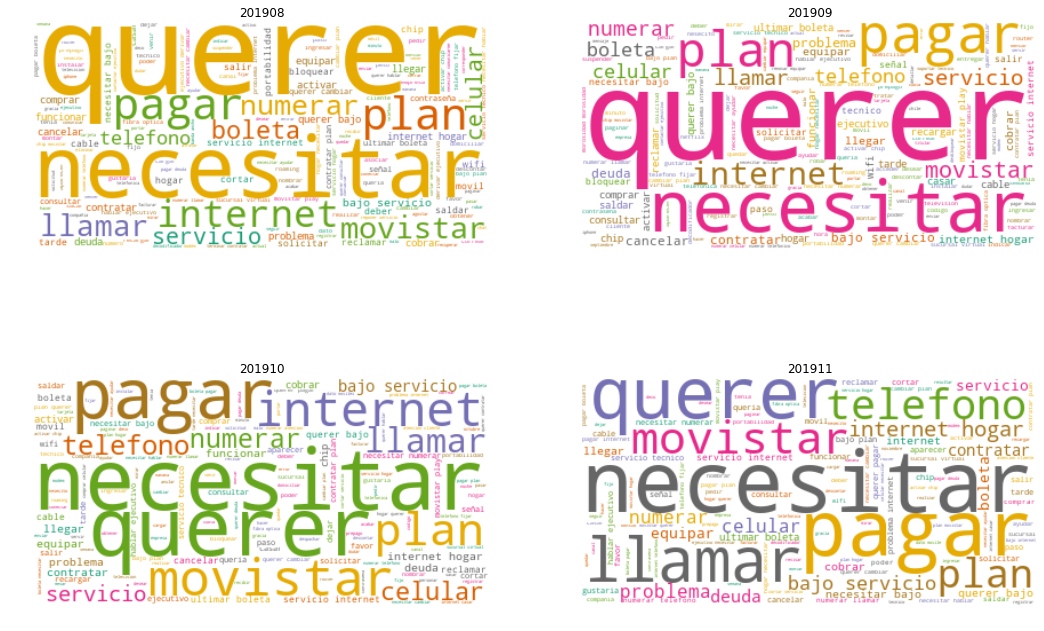

In [20]:
# A continuación es visualizada una nube de palabras para cada uno de los 4 meses


# Se importan las librerias requeridas
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud


#wc = WordCloud(stopwords=stopwords.words('spanish'), background_color="white", colormap="Dark2",
#               max_font_size=150, random_state=42)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


plt.rcParams['figure.figsize'] = [18,12]

l_mes = ['201908','201909','201910','201911']

# Crea subgráficos para cada uno de los 4 meses.
for index, mes in enumerate(data.columns):
    wc.generate(data_clean.texto[mes])
    plt.subplot(2, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(l_mes[index])
    
plt.show()

# <a id='5'>5. Estadísticas de palabras por mes.</a>

In [21]:
# Identifica los elementos distintos de cero en la matriz de términos del documento,
# lo que significa que la palabra aparece al menos una vez.
unique_list = []
for mes in data.columns:
    uniques = data[mes].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
#unique_list

# Crea un  a new dataframe la cuenta de las palabras.
data_words = pd.DataFrame(list(zip(l_mes, unique_list)), columns=['mes', 'palabras_unicas'])
#data_unique_sort = data_words.sort_values(by='palabras_unicas')
data_unique_sort = data_words # sin ordenar
data_unique_sort

,mes,palabras_unicas
0,201908,2245
1,201909,2638
2,201910,3811
3,201911,6320


In [22]:
# Obtiene el total de palabras por mes (las palabras pueden estar repetidas)
total_list = []
for mes in data.columns:
    totals = sum(data[mes])
    total_list.append(totals)
data_words['total_de_palabras'] = total_list
data_wpm_sort = data_words #sin ordenar
data_wpm_sort

,mes,palabras_unicas,total_de_palabras
0,201908,2245,21011
1,201909,2638,29693
2,201910,3811,49200
3,201911,6320,118953


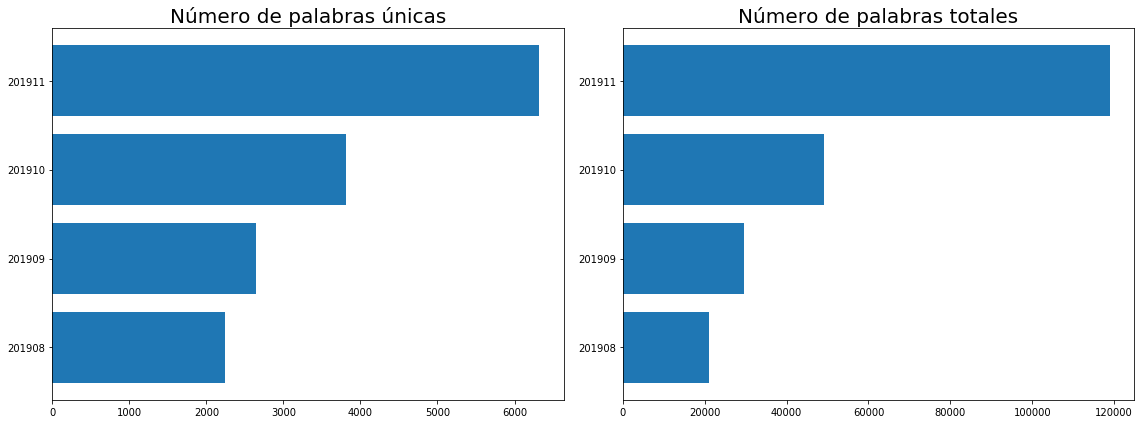

In [23]:
# Gráfica de la tabla anterior
import numpy as np
plt.rcParams['figure.figsize'] = [16, 6]

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.palabras_unicas, align='center')
plt.yticks(y_pos, data_unique_sort.mes)
plt.title('Número de palabras únicas', fontsize=20)


plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.total_de_palabras, align='center')
plt.yticks(y_pos, data_wpm_sort.mes)
plt.title('Número de palabras totales', fontsize=20)

plt.tight_layout()
plt.show()

# <a id='6'>6. Análisis de sentimientos.</a>

In [24]:
# Leeremos el corpus que aún preserva el orden de las palabras
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,texto
201908,hace aproximado tres meses me encuentro sin servicios en mi linia telefonica Consumo de datos y minutos de preplan Hola necesito que me indiques m...
201909,Hola hoy pague mi boleta vencida en sencillito y aun no reponen el servicio de internet COMO VEO SI TENGO SALDO EN MI CELULAR mi telefono es con p...
201910,Necesito pagar mi ultima boleta Hoy transferi mis 4 lineas a mi hijo y no encuentro como pagar la ultima boleta Gracias revisar mi deuda Hola no p...
201911,estado de mi linea portbilidad Portabilidad Roxana Allende 95169244 Roxana allende Tengo una duda Necesito saber cuanto es el maximo que puedo gas...


## <a id='6.1'>6.1. TextBlob, translate, sentiment.</a>

In [25]:
# Se importan las librerias requeridas
from textblob import TextBlob
from textblob.translate import Translator
    
pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity


# Durante las pruebas nos dimos cuenta que la llamada TextBlob(text).translate(to="en")
# para traducir texto al ingles, soporta hasta 30.000 caracteres app. Por lo tanto dado que los 
# textos a traducir son mayores a 30.000 carácteres, entonces se creo la función es_to_en()
# ecpecialmente para ese próposito. Para un texto dado, si es mayor a 30.000 caracteres, hace 
# particiones de 30.000 caracteres y va haciendo llamadas TextBlob(text).translate(to="en"),
# devolviendo finalmente el texto traducido al ingles.
def es_to_en(text, max_char=30000):
    s_en      = ' '
    resto     = (len(text) % max_char)
    if resto  > 0:
        resto = 1
    iteracion = (len(text) //max_char) + resto
    #print(iteracion)
    for i in range(iteracion):
        pos_ini = i*max_char
        pos_fin = (i+1)*max_char
        if len(text) < pos_fin:
            pos_fin = len(text)
        #print(pos_ini,pos_fin)
        s_en += str(TextBlob(text[pos_ini:pos_fin]).translate(to="en"))

    return s_en

traducir = lambda x: es_to_en(x)

data['blob_en'] = data['texto'].apply(traducir)
#data['polarity'] = data['blob_en'].apply(pol2)
#data['subjectivity'] = data['blob_en'].apply(sub2)
data['polarity'] = data['blob_en'].apply(pol)
data['subjectivity'] = data['blob_en'].apply(sub)
data

,texto,blob_en,polarity,subjectivity
201908,hace aproximado tres meses me encuentro sin servicios en mi linia telefonica Consumo de datos y minutos de preplan Hola necesito que me indiques m...,Approximately three months ago I found myself without services on my telephone line Data consumption and preplan minutes Hello I need you to indi...,0.118874,0.413119
201909,Hola hoy pague mi boleta vencida en sencillito y aun no reponen el servicio de internet COMO VEO SI TENGO SALDO EN MI CELULAR mi telefono es con p...,"Hello, today I paid my expired ballot in simple and still they do not replace the internet service HOW DO I SEE IF I HAVE A BALANCE IN MY CELL PH...",0.110692,0.401650
201910,Necesito pagar mi ultima boleta Hoy transferi mis 4 lineas a mi hijo y no encuentro como pagar la ultima boleta Gracias revisar mi deuda Hola no p...,I need to pay my last ballot Today I transferred my 4 lines to my son and I cannot find how to pay the last ballot Thank you to check my debt Hel...,0.112820,0.408629
201911,estado de mi linea portbilidad Portabilidad Roxana Allende 95169244 Roxana allende Tengo una duda Necesito saber cuanto es el maximo que puedo gas...,status of my portability line Portability Roxana Allende 95169244 Roxana allende I have a question I need to know how much is the maximum that I ...,0.113443,0.394814


In [26]:
# Esto es un nuevo campo por si quisieramos agregar alguna info adicional a cada mes
# Nuestro caso repetimos los meses, nos servirá para alguna visualización
anio_mes = ['201908','201909','201910','201911']

data['anio_mes'] = anio_mes
data

,texto,blob_en,polarity,subjectivity,anio_mes
201908,hace aproximado tres meses me encuentro sin servicios en mi linia telefonica Consumo de datos y minutos de preplan Hola necesito que me indiques m...,Approximately three months ago I found myself without services on my telephone line Data consumption and preplan minutes Hello I need you to indi...,0.118874,0.413119,201908
201909,Hola hoy pague mi boleta vencida en sencillito y aun no reponen el servicio de internet COMO VEO SI TENGO SALDO EN MI CELULAR mi telefono es con p...,"Hello, today I paid my expired ballot in simple and still they do not replace the internet service HOW DO I SEE IF I HAVE A BALANCE IN MY CELL PH...",0.110692,0.401650,201909
201910,Necesito pagar mi ultima boleta Hoy transferi mis 4 lineas a mi hijo y no encuentro como pagar la ultima boleta Gracias revisar mi deuda Hola no p...,I need to pay my last ballot Today I transferred my 4 lines to my son and I cannot find how to pay the last ballot Thank you to check my debt Hel...,0.112820,0.408629,201910
201911,estado de mi linea portbilidad Portabilidad Roxana Allende 95169244 Roxana allende Tengo una duda Necesito saber cuanto es el maximo que puedo gas...,status of my portability line Portability Roxana Allende 95169244 Roxana allende I have a question I need to know how much is the maximum that I ...,0.113443,0.394814,201911


## <a id='6.2'>6.2. Gráfica de Análisis de Sentimiento.</a>

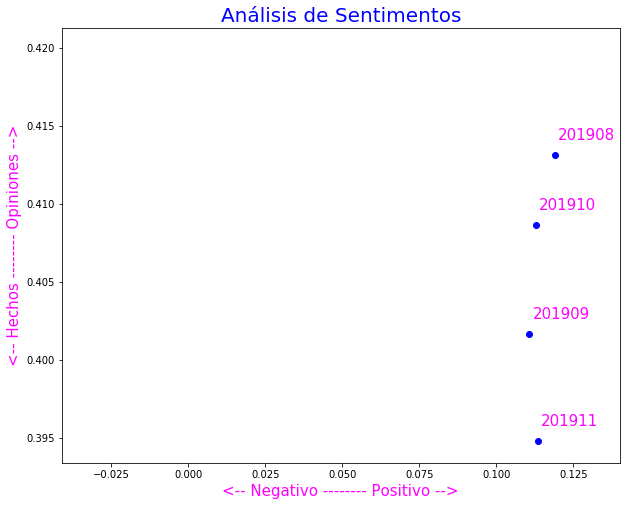

In [27]:
# Vamos a graficar los analisis de sentimientos realizados por la libreria
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, mes in enumerate(data.index):
    x = data.polarity.loc[mes]
    y = data.subjectivity.loc[mes]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['anio_mes'][mes], fontsize=15, color='magenta')
    plt.xlim(-0.041, 0.140) 
    
plt.title('Análisis de Sentimentos', fontsize=20, color = 'blue')
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15, color='magenta')
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15, color='magenta')

plt.show()

__Haremos el análisis de sentimientos por mes, dividiendo cada mes en 4(aproximadamente cada mes tiene 4 semanas)__

In [28]:
# Split cada texto en 4 subtextos aproximadamente del mismo largo.os
import numpy as np
import math

def split_text(text, n=4):
    '''Toma un texto y lo splitea en 4 partes iguales por defecto.'''

    # Calcula el largo del texto, el tamaño de cada pedazo de texto, y sus posiciones de 
    # de inicio y fin.
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Deja en una lista el texto spliteado
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [29]:
# Es creada la lista con todos los trozos de textos
list_pieces = []
for t in data.blob_en:
    split = split_text(t,4)
    list_pieces.append(split)   
#list_pieces

In [30]:
# La lista tiene 4 elementos, 1 por cada texto.
len(list_pieces)

4

In [31]:
# Y cada texto ha sido Spliteado en 4 trozos.
len(list_pieces[0])

4

In [32]:
# Es calcuala la polaridad de cada una de los trozos de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
        
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.1209527537586665,
  0.06227041736608054,
  0.13336976529014763,
  0.15436940133037713],
 [0.10503919435378156,
  0.10479324891148703,
  0.12687670848322277,
  0.10704504382629412],
 [0.09962112468961798,
  0.13179023315865454,
  0.10493884484547171,
  0.11601915839491625],
 [0.11854703961165323,
  0.10562584603234373,
  0.1077490904888688,
  0.1218816076962618]]

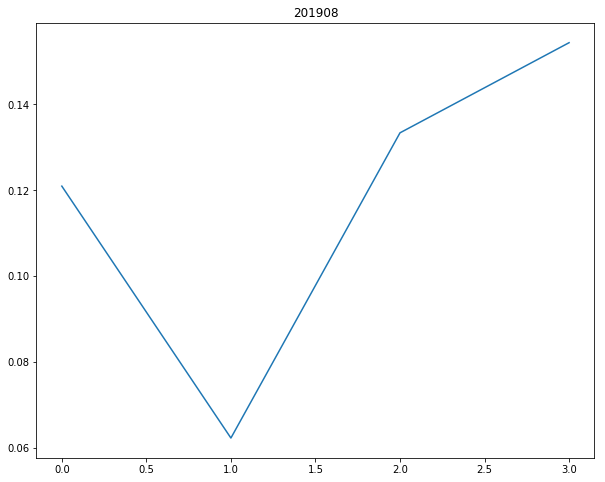

In [33]:
# Se muestra la grafica para agosto 2019
plt.plot(polarity_transcript[0])
plt.title(data['anio_mes'].index[0])
plt.show()

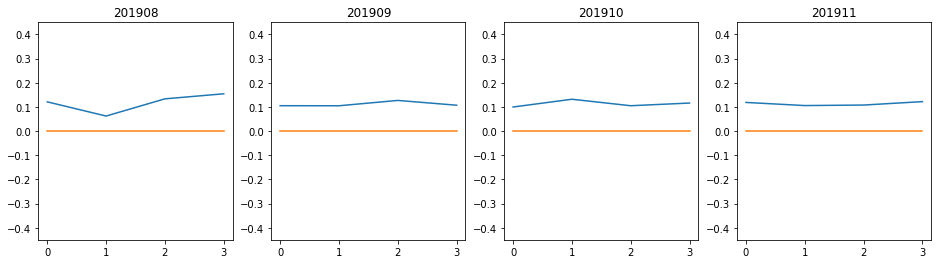

In [34]:
# Se muestran las gráficas par los cuatro meses.
plt.rcParams['figure.figsize'] = [16, 4]

for index, mes in enumerate(data.index):    
    plt.subplot(1, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,4), np.zeros(4))
    plt.title(data['anio_mes'][mes])
    plt.ylim(bottom=-.45, top=.45)
    
plt.show()

# <a id='7'>7. Identificación de tópicos relevantes.</a>



In [35]:
# Es leida la matriz de terminos de documentos.
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop.pkl')
data

,abandonar,abaratar,abarcar,abastar,abatir,abel,aber,aberiguar,abia,abian,...,zumbido,zurito,zuñiga,área,ñara,ñine,ñlevo,ñuble,ñuñoa,óptico
201908,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,3
201909,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,0
201910,1,0,0,0,0,0,2,0,1,1,...,0,0,1,0,1,0,0,0,1,0
201911,0,1,1,0,1,1,4,1,0,0,...,0,0,0,0,0,1,1,1,9,0


In [36]:
# Se importan las librerias requeridas
from gensim import matutils, models
import scipy.sparse

# Se requiere como entrada la matriz de terminos-documentos
tdm = data.transpose()
tdm.head()


,201908,201909,201910,201911
abandonar,1,0,1,0
abaratar,0,0,0,1
abarcar,0,0,0,1
abastar,1,0,0,0
abatir,0,0,0,1


## <a id='7.1'>7.1. Primera aproximación a identificación de tópicos relevantes.</a>

In [37]:
# Se lleva la matriz de terminos-documentos a un nuevo gensim
# Desde dataframe --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [38]:
# Gensim también requiere un diccionario de todos sus terminos con sus respectiva ubicación en la
# matriz de terminos-documentos

cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [39]:
# Ahora que tenemos el corpus (matriz de terminos-documentos) 
# e id2word (diccionario de ubicación : terminos), necesitamos especificar los parametros 
# numero de topicos y numero de iteraciones

lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.047*"necesitar" + 0.036*"querer" + 0.031*"internet" + 0.031*"pagar" + 0.030*"servicio" + 0.025*"plan" + 0.022*"numerar" + 0.018*"movistar" + 0.016*"llamar" + 0.015*"telefono"'),
 (1,
  '0.043*"querer" + 0.038*"necesitar" + 0.030*"servicio" + 0.029*"internet" + 0.026*"pagar" + 0.025*"plan" + 0.021*"numerar" + 0.019*"movistar" + 0.015*"boleta" + 0.015*"llamar"')]

In [40]:
# LDA para num_topics = 3 y passes=10
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.009*"querer" + 0.006*"necesitar" + 0.006*"servicio" + 0.005*"plan" + 0.004*"movistar" + 0.004*"pagar" + 0.004*"numerar" + 0.003*"internet" + 0.003*"bajo" + 0.003*"boleta"'),
 (1,
  '0.007*"necesitar" + 0.006*"querer" + 0.005*"servicio" + 0.005*"plan" + 0.004*"internet" + 0.003*"bajo" + 0.003*"movistar" + 0.003*"pagar" + 0.003*"llamar" + 0.003*"boleta"'),
 (2,
  '0.045*"necesitar" + 0.040*"querer" + 0.031*"internet" + 0.031*"servicio" + 0.030*"pagar" + 0.026*"plan" + 0.022*"numerar" + 0.019*"movistar" + 0.016*"llamar" + 0.015*"boleta"')]

In [41]:
# LDA para num_topics = 4 y passed = 10
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.045*"necesitar" + 0.040*"querer" + 0.032*"internet" + 0.031*"servicio" + 0.030*"pagar" + 0.026*"plan" + 0.023*"numerar" + 0.019*"movistar" + 0.016*"llamar" + 0.016*"boleta"'),
 (1,
  '0.009*"querer" + 0.008*"necesitar" + 0.007*"plan" + 0.006*"internet" + 0.006*"pagar" + 0.006*"numerar" + 0.005*"movistar" + 0.005*"servicio" + 0.004*"boleta" + 0.004*"hogar"'),
 (2,
  '0.030*"necesitar" + 0.026*"querer" + 0.020*"servicio" + 0.017*"internet" + 0.017*"plan" + 0.016*"numerar" + 0.015*"movistar" + 0.012*"pagar" + 0.010*"boleta" + 0.010*"llamar"'),
 (3,
  '0.006*"necesitar" + 0.006*"querer" + 0.005*"plan" + 0.004*"pagar" + 0.004*"internet" + 0.004*"servicio" + 0.004*"numerar" + 0.003*"movistar" + 0.003*"telefono" + 0.003*"hogar"')]

## <a id='7.2'>7.2. Identificación de tópicos relevantes usando sustantivos.</a>

In [42]:
# Es creada una función para construir un pull de sustantivos desde los textos
from nltk import word_tokenize, pos_tag

def nouns(text):
    
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text,language='spanish')
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [43]:
# Es rescatado el dataframe data_clean
data_clean = pd.read_pickle('data_clean.pkl')
data_clean

,texto
201908,aproximar mesar encontrar servicio linia telefonica consumir dato minuto preplan hola necesitar indicar boleta internet hogar llegar cortar servic...
201909,hola pagar boleta vencer sencillito reponer servicio internet saldar celular telefono plan llamar necesitar pagar plan mirar problema page banco d...
201910,necesitar pagar ultimar boleta transferi linear hijo encontrar pagar ultimar boleta gracia revisar deuda hola llamar corto querer ultimar boleta h...
201911,linear portbilidad portabilidad roxana allende roxana allende dudar necesitar maximo gastar facturacion movistar google play chupalo stock stock q...


In [44]:
# Es spliteado el dataframe data_clean, en 4 por cada uno de los 4 meses
colname=[]
list_pieces = []
contador=0
for t in data_clean.texto:
    split = split_text(t,4)
    subcont=0
    for p in split:
        list_pieces.append(p)
        colname.append(str(201908+contador)+ "-" + str(subcont))
        subcont=subcont+1
    contador=contador+1
print('# elementos del split realizado:', len(list_pieces))

# elementos del split realizado: 16


In [45]:
# Es generado el dataframe data_split2 con el split realizado en el paso anterior
data_split = pd.DataFrame(data=list_pieces).transpose()
data_split.columns=colname
data_split2=data_split.transpose()
data_split2.columns = ['texto']
data_split2

,texto
201908-0,aproximar mesar encontrar servicio linia telefonica consumir dato minuto preplan hola necesitar indicar boleta internet hogar llegar cortar servic...
201908-1,able mesar telefono reclamar hola gustar bajo plan local iphone gold disponibilidad iphone gold comprar iphone gold hola querer cambiar numerar te...
201908-2,erer bajo servicio internet hogar hola cortar servicio movil cortar servicio telefonico llamar necesitar cargar celular hola pagar deuda atrasar p...
201908-3,pagar recien tardo habilitar linear habilitar minuto problema recibir llamar constantemente indicar sonar buzon ubicar hola gustaria roaming quer...
201909-0,hola pagar boleta vencer sencillito reponer servicio internet saldar celular telefono plan llamar necesitar pagar plan mirar problema page banco d...
201909-1,liente problema señal error facturacion saldar movistar error comprar aplicacionesen google play necesitar llamar reclamar necesitar llamar reclam...
201909-2,iar chip necesitar ayudar tecnica chat funcionar cliente hola necesitar contratar netflix pagarlo boleta movistar internet necesitar contactar eje...
201909-3,ia soportar feriar reprogramado convenir pagar peso deber entregar servicio pagar plata telefono deber bajarme servicio favor subir ejecutivo extr...
201910-0,necesitar pagar ultimar boleta transferi linear hijo encontrar pagar ultimar boleta gracia revisar deuda hola llamar corto querer ultimar boleta h...
201910-1,erer registrar numerar chip telefono servicio registrarme hola tenia venir tecnico reparacion horario recordar contrasena pagar deuda plan paginar...


In [46]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(data_split2.texto.apply(nouns))
data_nouns

,texto
201908-0,aproximar mesar encontrar servicio linia telefonica consumir dato minuto preplan necesitar indicar boleta internet hogar llegar cortar servicio mo...
201908-1,mesar telefono reclamar hola gustar bajo plan iphone gold disponibilidad iphone gold comprar iphone gold hola querer cambiar telefono restablecer ...
201908-2,erer bajo internet hogar hola cortar movil cortar servicio telefonico llamar necesitar cargar hola pagar deuda atrasar plan servicio hola cambiar ...
201908-3,pagar recien tardo habilitar habilitar minuto problema recibir llamar constantemente indicar sonar buzon ubicar hola gustaria tecnico hogar telefo...
201909-0,hola pagar boleta vencer sencillito reponer internet saldar celular telefono plan pagar plan page banco desconto descontar servicio page page page...
201909-1,liente problema señal error facturacion saldar movistar error comprar aplicacionesen google play necesitar llamar reclamar necesitar llamar reclam...
201909-2,chip necesitar ayudar tecnica cliente hola necesitar contratar netflix pagarlo boleta movistar internet necesitar contactar deuda robar necesitar ...
201909-3,soportar feriar reprogramado convenir pagar peso deber entregar servicio pagar plata telefono deber bajarme servicio favor subir ejecutivo extranj...
201910-0,necesitar pagar boleta transferi hijo encontrar pagar boleta gracia revisar deuda hola llamar corto querer boleta hola querer demorar restablecer ...
201910-1,erer registrar chip telefono servicio registrarme hola tenia venir tecnico reparacion horario recordar contrasena pagar deuda plan comprar bolsa i...


In [47]:
# Creación de una nueva matriz de terminos-documentos.

# Se importan las librerias requeridas 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Este listado de stop_word fue entregado por el modulo sklearn.feature_extraction
# motivo por el cual se agregan como stop_word
stop_word_warning = ['ais', 'amos', 'an', 'as', 'bamos', 'estarã', 'estuviã', 'estã', 'fuã',
                     'habrã', 'habã', 'hayã', 'hubiã', 'is', 'mã', 'quã', 'ramos', 'semos', 
                     'serã', 'seã', 'sã', 'tambiã', 'tendrã', 'tengã', 'tenã', 'tuviã', 'tãº']
more_stop_words=['hola','clavar','linear','calero']

with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in more_stop_words:
    stop_words.append(pal)
for pal in stop_word_warning:
    stop_words.append(pal)

# Vuelve a crear una matriz de terminos-documentoss
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.texto)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaa,aaaah,aaaalooo,aaparece,abajar,abajito,abandonar,abaratar,abarcar,abastar,...,zona,zorro,zumbido,zurito,área,ñara,ñine,ñlevo,ñuñoa,óptico
201908-0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,2
201908-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201908-2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
201908-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201909-0,0,0,0,0,0,0,0,0,0,0,...,8,0,0,1,0,0,0,0,0,0
201909-1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
201909-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201909-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201910-0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
201910-1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [48]:
# Creación el corpus gensim
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [49]:
# Comencemos con 2 tópicos
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.048*"necesitar" + 0.045*"querer" + 0.036*"internet" + 0.035*"pagar" + 0.032*"plan" + 0.029*"servicio" + 0.022*"movistar" + 0.018*"llamar" + 0.018*"boleta" + 0.017*"bajo"'),
 (1,
  '0.004*"internet" + 0.003*"pagar" + 0.003*"plan" + 0.003*"necesitar" + 0.002*"querer" + 0.002*"servicio" + 0.002*"bajo" + 0.002*"llamar" + 0.001*"movistar" + 0.001*"boleta"')]

In [50]:
# Veamos con 3 tópicos
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.048*"necesitar" + 0.042*"pagar" + 0.042*"querer" + 0.034*"internet" + 0.031*"plan" + 0.030*"servicio" + 0.021*"movistar" + 0.020*"boleta" + 0.018*"llamar" + 0.015*"bajo"'),
 (1,
  '0.047*"querer" + 0.046*"necesitar" + 0.037*"internet" + 0.032*"plan" + 0.029*"pagar" + 0.028*"servicio" + 0.022*"movistar" + 0.018*"bajo" + 0.018*"llamar" + 0.018*"hogar"'),
 (2,
  '0.004*"necesitar" + 0.004*"internet" + 0.003*"plan" + 0.003*"pagar" + 0.003*"querer" + 0.002*"servicio" + 0.001*"llamar" + 0.001*"hogar" + 0.001*"movistar" + 0.001*"problema"')]

In [51]:
# Ahora con 4 tópicos
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.011*"necesitar" + 0.007*"querer" + 0.007*"internet" + 0.005*"pagar" + 0.005*"servicio" + 0.004*"plan" + 0.004*"movistar" + 0.004*"bajo" + 0.004*"llamar" + 0.004*"hogar"'),
 (1,
  '0.048*"necesitar" + 0.046*"querer" + 0.036*"internet" + 0.036*"pagar" + 0.032*"plan" + 0.030*"servicio" + 0.022*"movistar" + 0.019*"boleta" + 0.019*"llamar" + 0.017*"bajo"'),
 (2,
  '0.024*"querer" + 0.021*"necesitar" + 0.020*"plan" + 0.018*"internet" + 0.017*"pagar" + 0.013*"servicio" + 0.012*"bajo" + 0.011*"movistar" + 0.011*"ejecutivo" + 0.010*"llamar"'),
 (3,
  '0.003*"necesitar" + 0.002*"servicio" + 0.002*"querer" + 0.002*"internet" + 0.002*"movistar" + 0.001*"pagar" + 0.001*"plan" + 0.001*"llamar" + 0.001*"problema" + 0.001*"bajo"')]

## <a id='7.3'>7.3. Identificación de tópicos relevantes usando sustantivos y adjetivos.</a>

In [52]:
# Es creada una función para tokenozar el texto y generar sustantivos y adjetivos
def nouns_adj(text):
    ''' Dado un texto, es tokenizado y genera solo sustantivos y adjetivos '''
    
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text,language='spanish')
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [53]:
# Aplicando la funcion al daframe data_split2
data_nouns_adj = pd.DataFrame(data_split2.texto.apply(nouns_adj)) #data_clean
data_nouns_adj

,texto
201908-0,aproximar mesar encontrar servicio linia telefonica consumir dato minuto preplan necesitar indicar boleta internet hogar llegar cortar servicio mo...
201908-1,able mesar telefono reclamar hola gustar bajo plan local iphone gold disponibilidad iphone gold comprar iphone gold hola querer cambiar telefono v...
201908-2,erer bajo servicio internet hogar hola cortar movil cortar servicio telefonico llamar necesitar cargar celular hola pagar deuda atrasar plan salir...
201908-3,pagar recien tardo habilitar linear habilitar minuto problema recibir llamar constantemente indicar sonar buzon ubicar hola gustaria querer servic...
201909-0,hola pagar boleta vencer sencillito reponer servicio internet saldar celular telefono plan necesitar pagar plan problema page banco desconto desco...
201909-1,liente problema señal error facturacion saldar movistar error comprar aplicacionesen google play necesitar llamar reclamar necesitar llamar reclam...
201909-2,iar chip necesitar ayudar tecnica cliente hola necesitar contratar netflix pagarlo boleta movistar internet necesitar contactar celular deuda roba...
201909-3,ia soportar feriar reprogramado convenir pagar peso deber entregar servicio pagar plata telefono deber bajarme servicio favor subir ejecutivo extr...
201910-0,necesitar pagar ultimar boleta transferi linear hijo encontrar pagar ultimar boleta gracia revisar deuda hola llamar corto querer ultimar boleta h...
201910-1,erer registrar numerar chip telefono servicio registrarme hola tenia venir tecnico reparacion horario recordar contrasena pagar deuda plan necesit...


In [54]:
# Creación de una nueva matriz de terminos-documentos y elimina stop_words
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.texto)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaa,aaaah,aaaalooo,aaparece,abajar,abajito,abandonar,abaratar,abarcar,abastar,...,zorro,zumbido,zurito,área,ñara,ñine,ñlevo,ñuble,ñuñoa,óptico
201908-0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2
201908-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201908-2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
201908-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201909-0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
201909-1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
201909-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201909-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201910-0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
201910-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
# Crea el corpus gensim 
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [56]:
# Veamos con 2 tópicos
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.004*"noviembre" + 0.004*"octubre" + 0.004*"confirmar" + 0.003*"quedo" + 0.003*"stock" + 0.002*"nacional" + 0.002*"telefonos" + 0.002*"smart" + 0.002*"preplan" + 0.002*"departamento"'),
 (1,
  '0.005*"derivar" + 0.004*"número" + 0.004*"morosidad" + 0.003*"teléfono" + 0.003*"noviembre" + 0.002*"confirmar" + 0.002*"móvil" + 0.002*"julio" + 0.002*"limitar" + 0.002*"octubre"')]

In [57]:
# Veamos con 3 tópicos
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.009*"número" + 0.009*"derivar" + 0.006*"teléfono" + 0.005*"móvil" + 0.003*"preplan" + 0.003*"líneo" + 0.002*"confirmar" + 0.002*"gustar" + 0.002*"julio" + 0.002*"telefónico"'),
 (1,
  '0.004*"noviembre" + 0.004*"confirmar" + 0.004*"octubre" + 0.003*"morosidad" + 0.003*"telefonos" + 0.002*"quedo" + 0.002*"stock" + 0.002*"smart" + 0.002*"porq" + 0.002*"derivar"'),
 (2,
  '0.004*"noviembre" + 0.004*"octubre" + 0.003*"nacional" + 0.003*"confirmar" + 0.003*"quedo" + 0.002*"departamento" + 0.002*"validar" + 0.002*"anoche" + 0.002*"reportar" + 0.002*"aceptar"')]

In [58]:
# Probamos a modelar con 4 tópicos
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.003*"noviembre" + 0.003*"octubre" + 0.003*"confirmar" + 0.003*"limitar" + 0.002*"ilimitado" + 0.002*"anoche" + 0.002*"humanar" + 0.002*"efectue" + 0.002*"correspondiente" + 0.002*"preplan"'),
 (1,
  '0.005*"derivar" + 0.005*"número" + 0.005*"octubre" + 0.004*"morosidad" + 0.003*"teléfono" + 0.003*"confirmar" + 0.003*"móvil" + 0.002*"departamento" + 0.002*"requisito" + 0.002*"samsung"'),
 (2,
  '0.007*"noviembre" + 0.005*"confirmar" + 0.004*"nacional" + 0.004*"octubre" + 0.003*"stock" + 0.003*"quedo" + 0.003*"telefonos" + 0.003*"preplan" + 0.003*"porq" + 0.002*"smart"'),
 (3,
  '0.000*"octubre" + 0.000*"confirmar" + 0.000*"noviembre" + 0.000*"derivar" + 0.000*"quedo" + 0.000*"telefonos" + 0.000*"preplan" + 0.000*"stock" + 0.000*"anoche" + 0.000*"smart"')]

In [59]:
# El modelo final LDA 
QTY_TOPICS=4
ldana = models.LdaModel(corpus=corpusna, num_topics=QTY_TOPICS, id2word=id2wordna, passes=80,
                        random_state=15)
ldana.print_topics(QTY_TOPICS,5)

[(0,
  '0.005*"noviembre" + 0.005*"octubre" + 0.004*"confirmar" + 0.003*"quedo" + 0.003*"telefonos"'),
 (1,
  '0.009*"morosidad" + 0.004*"elevar" + 0.003*"julio" + 0.003*"correspondiente" + 0.003*"bajarlo"'),
 (2,
  '0.005*"octubre" + 0.003*"preplan" + 0.002*"número" + 0.002*"cyber" + 0.002*"invalidar"'),
 (3,
  '0.006*"noviembre" + 0.005*"derivar" + 0.004*"nacional" + 0.004*"confirmar" + 0.003*"número"')]

In [60]:
# Veamos ahora, cuales tópicos están contenidos en que textos.
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(3, '201908-0'),
 (2, '201908-1'),
 (1, '201908-2'),
 (3, '201908-3'),
 (1, '201909-0'),
 (2, '201909-1'),
 (0, '201909-2'),
 (1, '201909-3'),
 (0, '201910-0'),
 (2, '201910-1'),
 (0, '201910-2'),
 (0, '201910-3'),
 (0, '201911-0'),
 (3, '201911-1'),
 (3, '201911-2'),
 (0, '201911-3')]

__A partir de los últimos resultados obtenidos, intentaremos interpretar cuales son los tópicos más relevantes de esos cuatros meses.__

Como primera observación se tiene que son mencionados los meses octubre y noviembre, eso podría tener que ver con plazos propios de los servicios que los usuarios contratan con telefónica. Y usando un poco la imaginación, quizá diga esto relación con los acontecimientos sucedidos a contar el 18 de octubre. Esto último lo podriamos validar o desechar si tuviesemos data de meses anteriores a octubre para realizar el análisis de tópicos relevantes.

Como segunda tópico relevante, nos aparece la morosidad, esto en un tema "común"(no deseado), en el mundo de las telecomunicaciones.

Como tercer tópico relevante podemos mencionar los conceptos número y teléfonos, que justamente se refiere al servicio prestado por la empresa asociada a la data usada.

Dicho lo anterior podemos mencionar los siguientes 3 tópicos:

* Meses, octubre y noviembre.
* Morosidad.
* Números, teléfonos.

# <a id='8'>8. Conclusión.</a>

Comentar que este segundo desafío ha sido muy interesante, pues nos ha permitido conocer y aplicar herramientas para hacer análisis sobre lo escrito por los usuarios.
También agregar que este desafío ha presentado vallas técnicas que superar; como por ejemplo tener que construir una función ad-hoc para superar la limitante de los aproximadamente 30.000 caracteres que soporta TextBlob para traducir el texto al inglés, cosa requerida para hacer el análisis de sentimiento.
Dado el desarrollo realizado, nos parece que las herramientas para hacer NLP, pueden mejorarse. En particular, pareciera ser que se podrían hacer mejoras en lo que se refiere al su aplicación sobre el lenguaje español.
No obstante lo anterior, estas herramientas permiten tener una buena aproximación a análisis masivos de los textos escritos por los usuarios y saber lo que ellos requieren.

Nos parece un elemento visual poderoso el uso de "Nube de palabras" para tener una idea de acerca de las palabras más escritas por los usuarios. Recordar que, "una imagen vale más que mil palabras".

Creemos que hacer análisis de los sentimientos de los usuarios a travez de sus escritos, pueden ser de gran ayuda de cara a prestar un mejor servicio.


En cuanto a los tópicos más relevantes, hemos detectado 3 (ver mayor detalle en el punto correspondiente):

* Meses, octubre y noviembre.
* Morosidad.
* Números, teléfonos.

Nos ha parecido este desafío entretenido, con mucho potencial, tanto para aprender como aplicar.

